<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV
house_csv = "sacramento_transactions.csv"

In [52]:
#Transform CSV to dataframe
df = pd.read_csv(house_csv)

# Show first few rows of DF
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [4]:
#description of the data
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [5]:
# How many rows and columns does the data have
df.shape

(985, 12)

In [6]:
#checking how many different cities in this dataframe
df['city'].nunique()

39

In [7]:
#checking the number of zip codes in this dataframe
df['zip'].nunique()

68

In [8]:
#checking the different types of housing
df['type'].unique()

array(['Residential', 'Condo', 'Multi-Family', 'Unkown'], dtype=object)

In [53]:
#Change sale date from object to datetime
df['sale_datetime'] = pd.to_datetime(df['sale_date'])

C:\Users\alice\anaconda3\envs\iod\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [10]:
#check if the new column is appended
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,sale_datetime
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,2008-05-21
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,2008-05-21
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,2008-05-21
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,2008-05-21
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,2008-05-21


Text(0.5, 1.0, 'Sale DateTime VS Price')

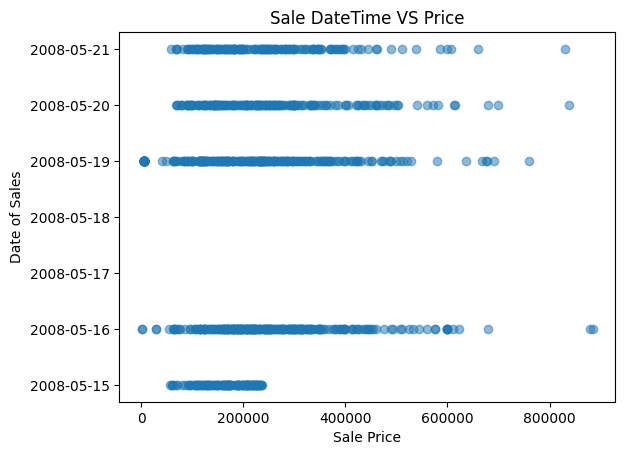

In [11]:
# Viz of when the Houses were sold and prices

#plotting the graph
plt.scatter(df['price'], df['sale_datetime'], alpha = 0.5)

#labeling the graph
plt.ylabel('Date of Sales')
plt.xlabel('Sale Price')
plt.title('Sale DateTime VS Price')

<AxesSubplot: xlabel='Number of Bathrooms', ylabel='Frequency'>

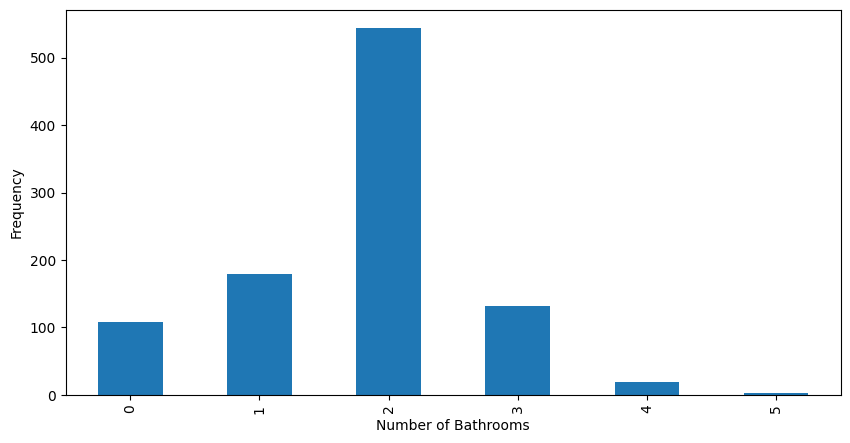

In [12]:
# plot of the frequency of different numbers of bathrooms

#the size of the graph
plt.figure(figsize = (10,5))

#labeling the graph
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')

#plotting the graph
df['baths'].value_counts().sort_index().plot.bar()

#There are obvious missing values since there shouldn't be 0 number of bathrooms

<AxesSubplot: xlabel='Number of Bathrooms', ylabel='Frequency'>

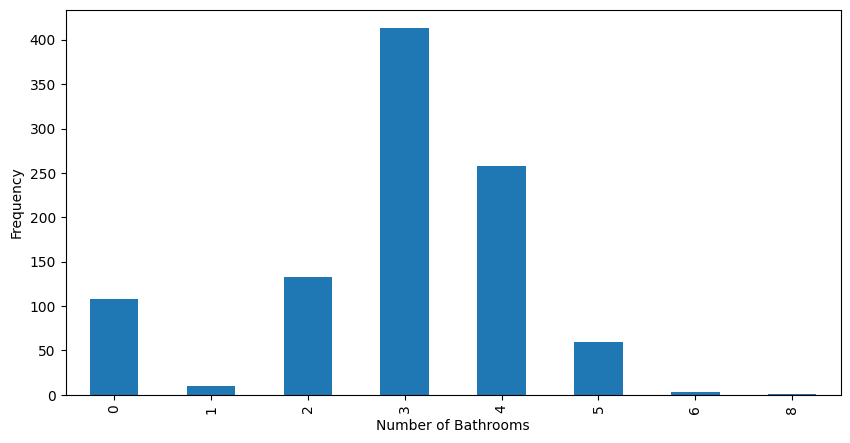

In [13]:
# plot of the frequency of different numbers of bedrooms

#setting the size of the graph
plt.figure(figsize = (10,5))

#labeling the axis
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')

#plotting the graph
df['beds'].value_counts().sort_index().plot.bar()

#There are obvious missing values since there shouldn't be 0 number of bedrooms

In [14]:
# Set the date as index
df.set_index('sale_datetime', inplace = True)

In [15]:
#Dataframe with NaN values
df_with_na = df.replace(0, np.NaN)

In [16]:
#checking the NaN values
df_with_na.isna().sum()

street         0
city           0
zip            0
state          0
beds         108
baths        108
sq__ft       171
type           0
sale_date      0
price          0
latitude       0
longitude      0
dtype: int64

In [17]:
#remove the rows with empty values
df_remove = df_with_na.dropna()

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [18]:
# ANSWER
# target variable = price as we want to predict the price from the other information.
Target_Var = df['price']

#### 2.2 List all possible variables which might be Predictor variable.

In [47]:
# ANSWER
# All possible variables which might be predictor variable would be: beds, baths, sq__ft, type, latitude, longitude
# Zip might be numerical however the averaged number may not be a zip number but inbetween, maybe can be changed to single numbers e.g. 0-67
# state is all in CA so there is no difference between the houses.
# latitude and longitude is where the house is on the map so therefore would work as street/city
Possible_Var = [c for c in df.columns if (c != 'price') & (c !='sale_date') & (c !='street') & (c !='city') &
                (c !='state') & (c !='sale_datetime') & (c !='zip')]
Possible_Var

['zip', 'beds', 'baths', 'sq__ft', 'type', 'latitude', 'longitude']

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [20]:
# ANSWER
# correlation of dataframe with all values including unknown values as 0.
df.corr()['price']

zip         -0.093353
beds         0.342024
baths        0.416208
sq__ft       0.333897
price        1.000000
latitude    -0.039573
longitude    0.284485
Name: price, dtype: float64

<AxesSubplot: >

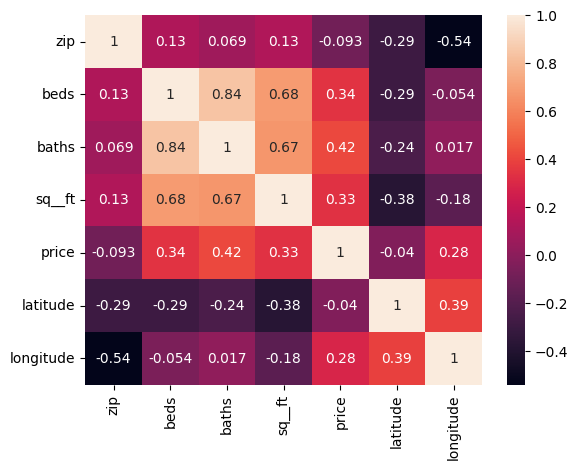

In [22]:
# visualisation of the correlation with heatmap
sns.heatmap(df.corr(), annot=True)

In [23]:
#using the dataframe including missing values as 0 then the best would be predictor variable would be
# how many bathrooms each house contain.

In [24]:
# correlation of dataframe with 0 values as NaN
df_with_na.corr()['price']

zip         -0.093353
beds         0.450966
baths        0.524377
sq__ft       0.693708
price        1.000000
latitude    -0.039573
longitude    0.284485
Name: price, dtype: float64

<AxesSubplot: >

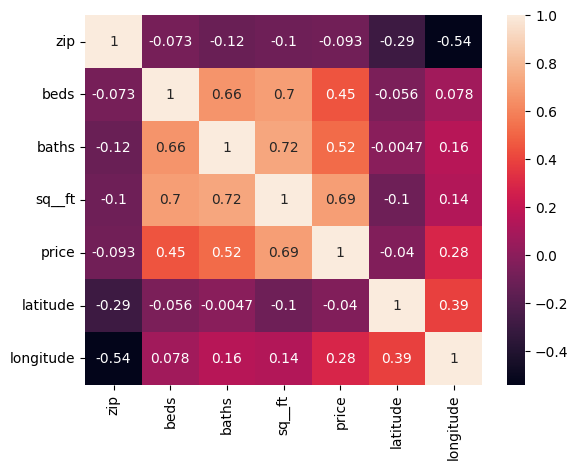

In [25]:
# visualisation of the correlation with heatmap
sns.heatmap(df_with_na.corr(), annot=True)

In [26]:
# however if we change the values from 0 to NaN then the best predictor variable according the the correlation values
# is how much sq_ft each house have.

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [27]:
# Guide for column names
df.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [66]:
# grouping the DF by bedrooms and finding the average
beds_price_mean = df.groupby(by = 'beds')['price'].mean()

# drop the column of missing values
beds_price_mean = beds_price_mean.drop(0)

In [67]:
# grouping the DF by bedrooms and finding the average
bath_price_mean = df.groupby(by = 'baths')['price'].mean()

# drop the column of missing values
bath_price_mean = bath_price_mean.drop(0)

In [70]:
# grouping the DF by bedrooms and finding the average
sqft_price_mean = df.groupby(by = 'sq__ft')['price'].mean()

# drop the column of missing values
sqft_price_mean = sqft_price_mean.drop(0)

In [71]:
# ANSWER grouping the different variables together to find a mean and then averaging the means together.
# Finding the mean prices of each different group of bathroom, bedroom and square feet
print(f"Mean or Mode of:\nBedrooms: {beds_price_mean}\nBathroom: {bath_price_mean}\nSquare_Feet: {sqft_price_mean}")

Mean or Mode of:
Bedrooms: beds
1    109646.200000
2    165428.300752
3    215612.915254
4    283260.093023
5    399541.542373
6    429966.666667
8    282400.000000
Name: price, dtype: float64
Bathroom: baths
1    159024.666667
2    226498.976103
3    380352.143939
4    358765.736842
5    755000.000000
Name: price, dtype: float64
Square_Feet: sq__ft
484      48000.0
539     334000.0
588     120000.0
610      93675.0
611      60000.0
          ...   
3992    460000.0
4246    452000.0
4303    450000.0
4400    884790.0
5822      2000.0
Name: price, Length: 602, dtype: float64


In [94]:
# create function to find the average across the 3 (beds, baths and sqft)
def predict_price(Num_Beds, Num_Baths, Num_Sqft):
    '''
    
    '''
    pred_price = (beds_price_mean[Num_Beds] + bath_price_mean[Num_Baths] + sqft_price_mean[Num_Sqft]) / 3
    return pred_price

In [95]:
# testing function: 
print(f"Predicted Price: ${round(predict_price(3, 2, 1204), 2)}")

Predicted Price: $205412.3


#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [88]:
# ANSWER

#append the beds, baths and sq__ft into lists

# empty list to append into
beds_list = []

#for loop to append all numbers of bedroom into new list
for a in df_remove['beds']:
    beds_list.append(a)

#checking list
beds_list[:5]

[2.0, 3.0, 2.0, 2.0, 2.0]

In [89]:
# empty list to append into
bath_list = []

#for loop to append all numbers of bathroom into new list
for a in df_remove['baths']:
    bath_list.append(a)

#checking list
bath_list[:5]

[1.0, 1.0, 1.0, 1.0, 1.0]

In [91]:
# empty list to append into
sqft_list = []

#for loop to append all numbers of bathroom into new list
for a in df_remove['sq__ft']:
    sqft_list.append(a)

#checking list
sqft_list[:5]

[836.0, 1167.0, 796.0, 852.0, 797.0]

In [97]:
#creating a list with all the predicted price values

# empty list to append into
pred_price_list = []

#for loop to append all numbers of bathroom into new list
for a, b, c in zip(beds_list, bath_list, sqft_list):
    pred_price = predict_price(a, b, c)
    pred_price_list.append(pred_price)

#checking list
pred_price_list[:5]

[137187.98913951544,
 147616.52730696797,
 144137.6558061821,
 131253.32247284878,
 135450.98913951544]

In [99]:
# calculating the residuals
residuals = pred_price_list - df_remove['price']
residuals

sale_datetime
2008-05-21    77965.989140
2008-05-21    79404.527307
2008-05-21    75257.655806
2008-05-21    61946.322473
2008-05-21    53550.989140
                  ...     
2008-05-15    74016.578988
2008-05-15   -22312.702881
2008-05-15   -10129.369548
2008-05-15     4168.856375
2008-05-15   -16608.036214
Name: price, Length: 814, dtype: float64

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [30]:
# ANSWER
# Variable used to predict price: sq_ft
X = df['sq__ft']
# Variable to predict: price
Y = df['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [31]:
# ANSWER
# for loop: for all index of X: xy = sum of all (Y(i) - mean of Y)*(X(i) - mean of X) and x2 = sum of all (X(i) - mean of X) squared
xy = 0
x2 = 0
for i in range(len(X)):
    xy += (X[i] - X.mean())*(Y[i] - Y.mean())
    x2 += (i - X.mean())**2

#Calculating beta_1 which is the xy divided by x2
beta_1 = xy/x2
beta_1

51.93730346580638

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [32]:
# ANSWER
#Calculating Beta_0 which is the Y.mean() - Beta_1 times X.mean()
beta_0 = Y.mean() - beta_1*X.mean()
beta_0

165851.0336164587

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [33]:
# ANSWER
# predicted value = beta_0 + Beta_1 times X
pred_y = beta_0 + beta_1*X
pred_y

sale_datetime
2008-05-21    209270.619314
2008-05-21    226461.866761
2008-05-21    207193.127175
2008-05-21    210101.616169
2008-05-21    207245.064479
                  ...      
2008-05-15    284268.085518
2008-05-15    242562.430835
2008-05-15    229006.794631
2008-05-15    253365.389956
2008-05-15    236589.640937
Name: sq__ft, Length: 985, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [34]:
# ANSWER
# calculating residuals(i) = for each value in Y and pred_y, Y minus pred_y
residual = Y-pred_y
residual

sale_datetime
2008-05-21   -150048.619314
2008-05-21   -158249.866761
2008-05-21   -138313.127175
2008-05-21   -140794.616169
2008-05-21   -125345.064479
                  ...      
2008-05-15    -51843.085518
2008-05-15     -8562.430835
2008-05-15      5993.205369
2008-05-15    -18064.389956
2008-05-15      -851.640937
Length: 985, dtype: float64

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [35]:
# ANSWER
# calculating for SStot = sum of all (Y(i) - mean of Y) squared and SSres = sum of all (Y(i) - predicted Y) squared
#function for calculating R2 using the SStot and SSres
def calculate_r2(Y_Var, Y_pred):
    """ Calculating and printing the R-squared value using the target variable (Y) and predicted target variable (predicted_Y)"""
    SS_tot = 0
    SS_res = 0
    for i in range(len(Y)):
        SS_tot += (Y[i] - Y.mean())**2
        SS_res += (Y[i] - pred_y[i])**2
    print(1 - (SS_tot/SS_res))

In [36]:
calculate_r2(Y, pred_y)

-0.12523864029677645


##### 2.7.F [BONUS] Draw Plot of Predicted Line

Text(0.5, 0, 'Number of Bathrooms')

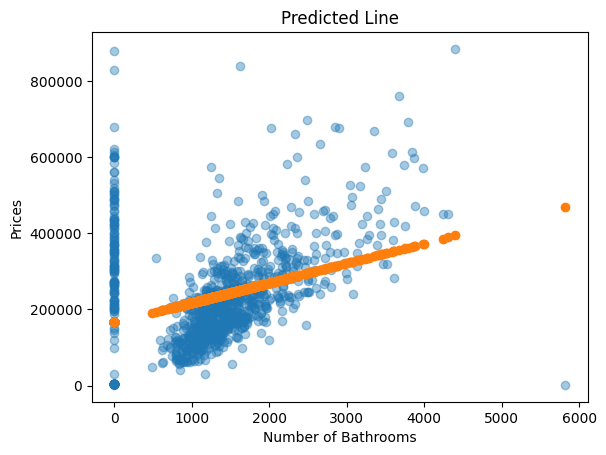

In [37]:
# ANSWER
fix, ax = plt.subplots()
ax.scatter(X, Y, alpha = 0.4)
ax.scatter(X, pred_y)
plt.title("Predicted Line")
plt.ylabel("Prices")
plt.xlabel("Number of Bathrooms")

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

Text(0.5, 0, 'Number of Bathrooms')

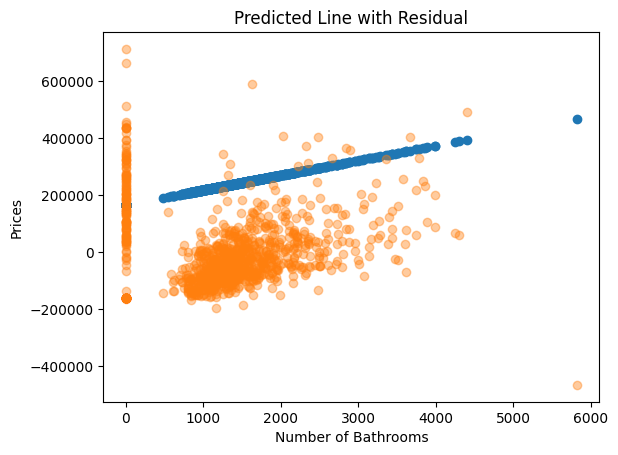

In [38]:
# ANSWER
fix, ax = plt.subplots()
ax.scatter(X, pred_y)
ax.scatter(X, residual, alpha = 0.4)
plt.title("Predicted Line with Residual")
plt.ylabel("Prices")
plt.xlabel("Number of Bathrooms")

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

[[  1204.         228383.54698929]]


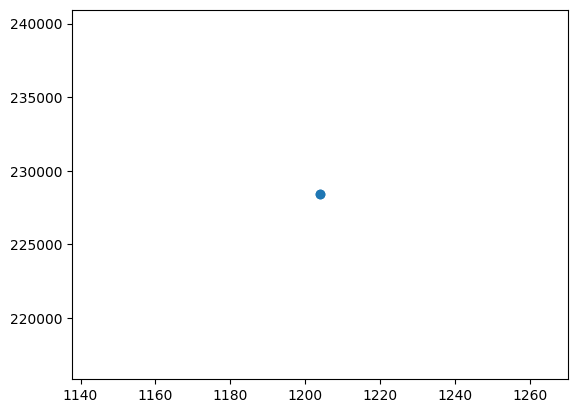

In [39]:
# ANSWER
point = plt.scatter(X[X == 1204], pred_y[X == 1204])
print(point.get_offsets().data[:1])
# Prediction of a 2 bathroom house is around $228383.54

In [40]:
df[df['street'] == '1140 EDMONTON DR']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
sale_datetime,,,,,,,,,,,,
2008-05-15,1140 EDMONTON DR,SACRAMENTO,95833,CA,3,2,1204,Residential,Thu May 15 00:00:00 EDT 2008,174250,38.62457,-121.486913




---



---



> > > > > > > > > © 2022 Institute of Data


---



---



